In [ ]:


# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Introduction
"""
## Introduction

The Diabetes Prediction Project is aimed at developing a machine learning model to predict the onset of diabetes within the next
five years based on various diagnostic measures. This project leverages data from 768 individuals, encompassing features such as
Glucose levels, Blood Pressure, Insulin, BMI, and more, alongside the outcome of whether the individuals developed diabetes.
Through exploratory data analysis, data preprocessing, and evaluating various machine learning models, this project seeks to identify
the most accurate predictor of diabetes onset. The outcome of this project has the potential to assist healthcare professionals in
identifying at-risk individuals for early intervention, ultimately contributing to better healthcare outcomes.
"""

# Data Loading
"""
## Data Loading

In this section, we load the diabetes dataset into a pandas DataFrame. This dataset includes measurements such as Glucose levels, Blood Pressure,
Skin Thickness, Insulin, BMI, Diabetes Pedigree Function, Age, and the outcome of whether the individuals have diabetes.
"""
# Loading the dataset
df = pd.read_csv('diabetes-2-1.csv')

# Display the first few rows to confirm successful loading
print("First few rows of the dataset:")
df.head()





First few rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Data Overview
"""
## Data Overview

After loading the data, we perform an initial examination to understand its structure, including checking for the presence of missing values,
understanding the distribution of numerical features, and obtaining a preliminary insight into the relationship between different features.
"""
# Displaying the shape of the dataset
print("Dataset shape:", df.shape)



Dataset shape: (768, 9)


In [ ]:
# Summary statistics of the dataset
print("Summary statistics of the dataset:")
df.describe()

Summary statistics of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Checking for missing values
print("Checking for missing values:")
df.isnull().sum()

Checking for missing values:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Distribution of the 'Outcome' variable (0: Non-diabetic, 1: Diabetic):


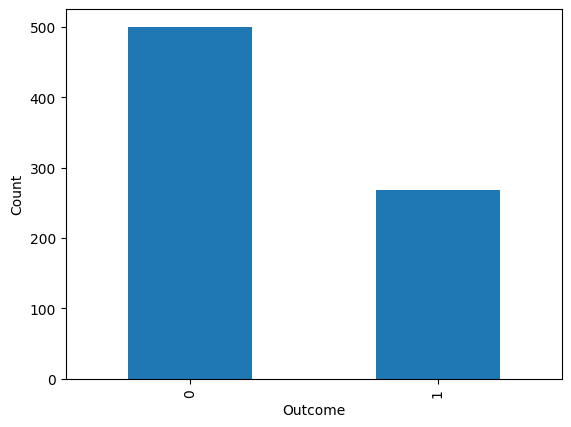

In [ ]:
# Displaying the distribution of the 'Outcome' variable
print("Distribution of the 'Outcome' variable (0: Non-diabetic, 1: Diabetic):")
df['Outcome'].value_counts().plot(kind='bar')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

In [ ]:
# Data Cleaning and Preprocessing
"""
## Data Cleaning and Preprocessing

Data cleaning is a crucial step before any analysis. In this section, we handle any missing values, remove duplicates if any, and apply normalization
or standardization to make the data suitable for analysis. Preprocessing the data ensures that we can achieve more accurate and reliable results from
our models.
"""
# Checking for duplicates and removing them (if any)
print("Number of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

Number of duplicate rows: 0


In [ ]:
# Handling missing values (if any). Here we'll show an example of filling missing values with the median.
# Note: It's crucial to check which approach is suitable for your dataset.
df.fillna(df.median(), inplace=True)

In [ ]:
# Standardizing the data: Excluding 'Outcome' from scaling.
features = df.columns.drop('Outcome')
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

print("Data after cleaning and preprocessing:")
df.head()

Data after cleaning and preprocessing:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


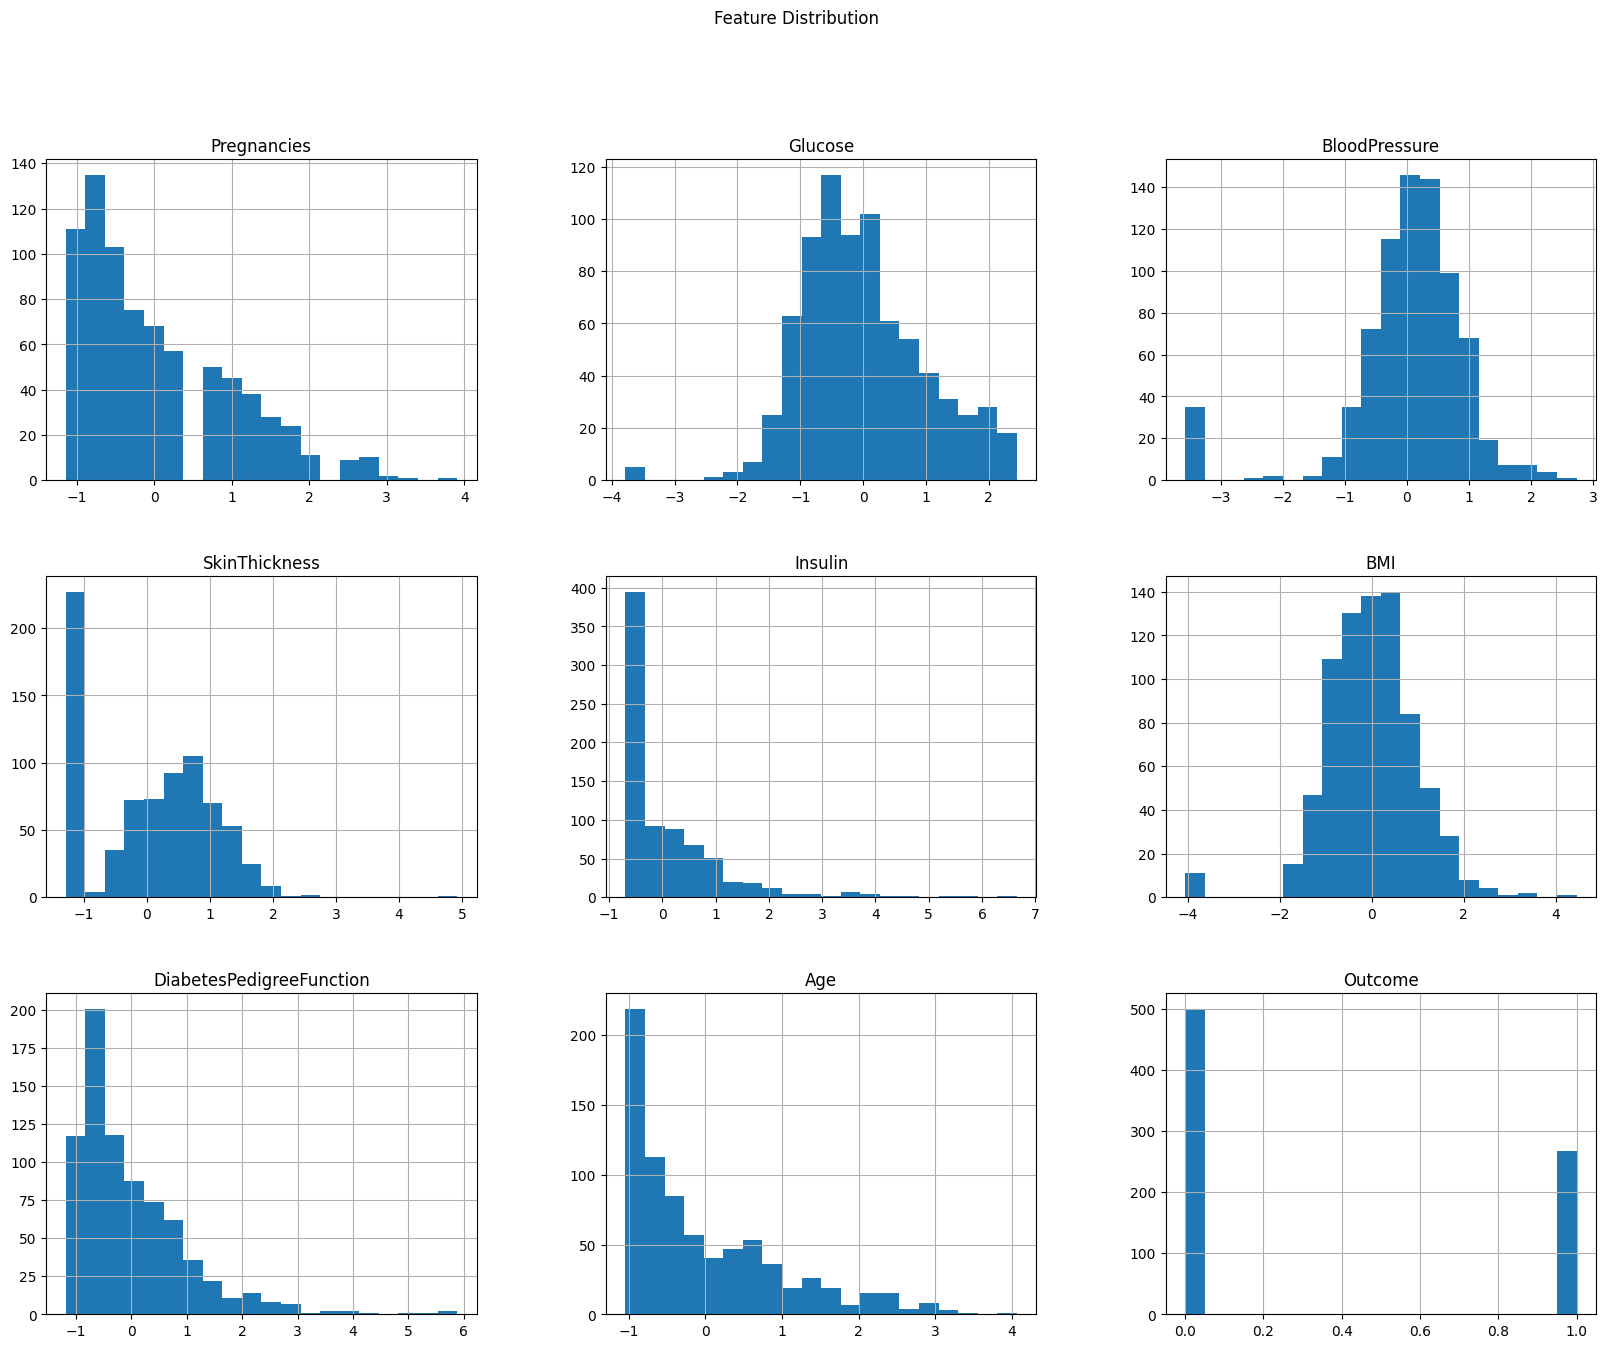

In [ ]:
# Exploratory Data Analysis (EDA)
"""
## Exploratory Data Analysis (EDA)

EDA is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. In this section, we explore the data to find any patterns, anomalies, or relationships between the features, using statistical summaries and visualization techniques. This step can help in identifying significant features for predicting diabetes.
"""
# Visualizing the distribution of each feature
df.hist(bins=20, figsize=(20, 15), layout=(3, 3))
plt.suptitle('Feature Distribution')
plt.show()

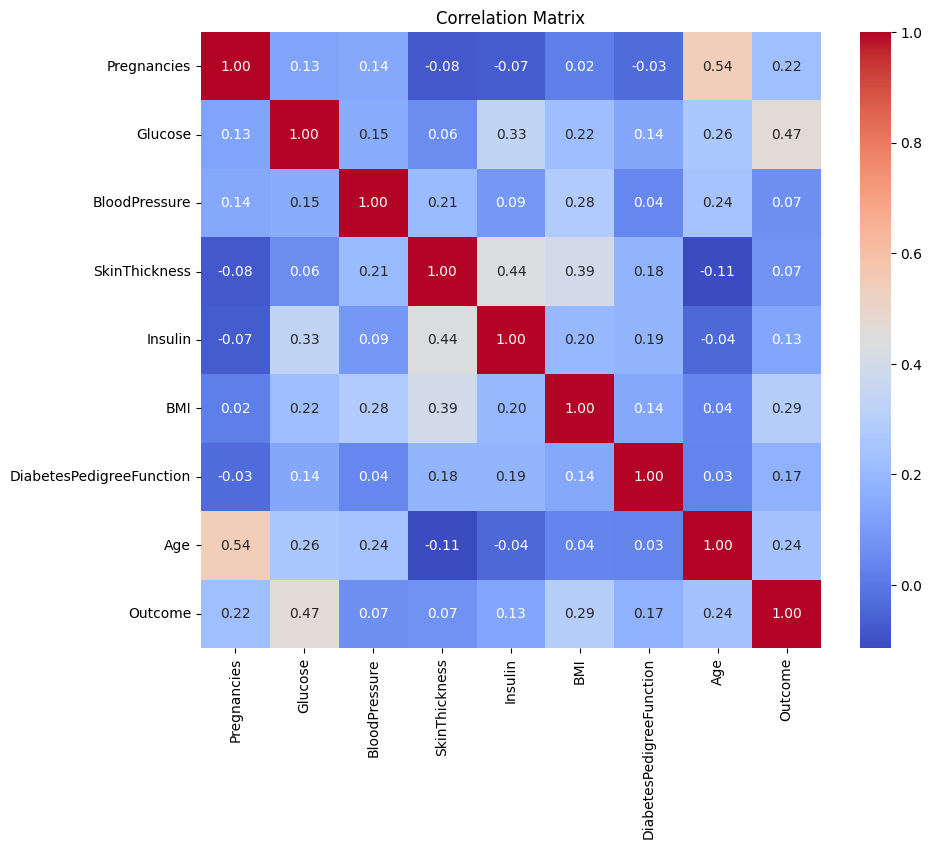

In [ ]:
# Plotting the correlation matrix to understand the relationship between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

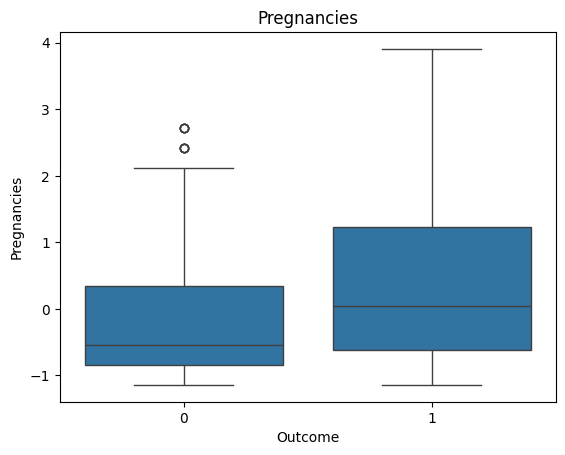

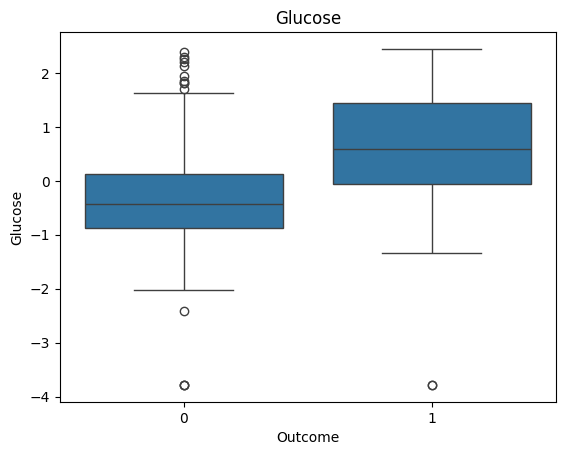

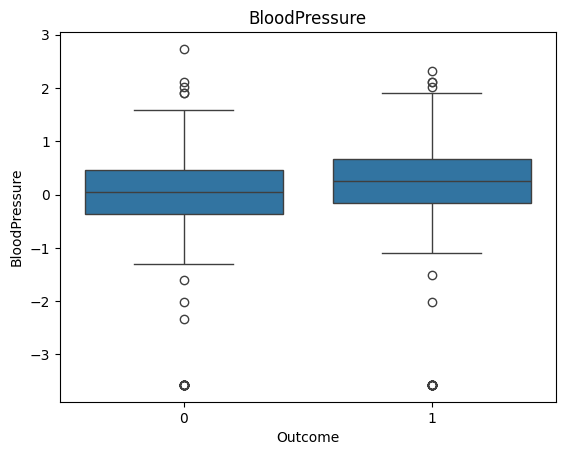

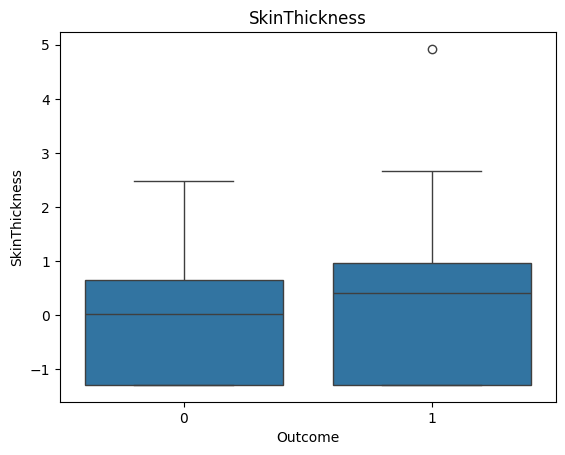

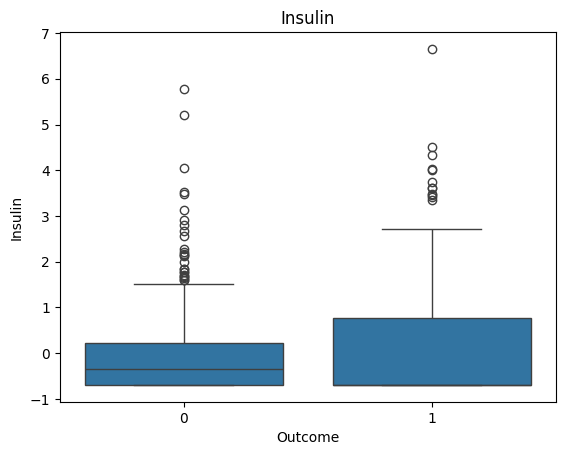

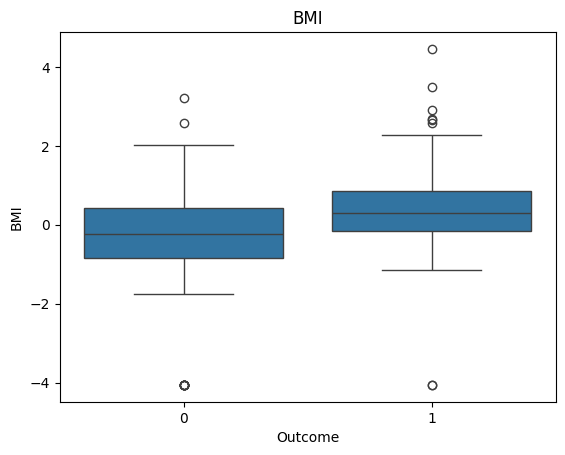

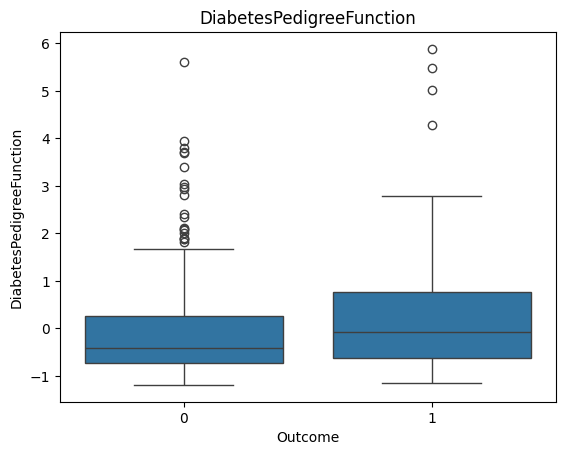

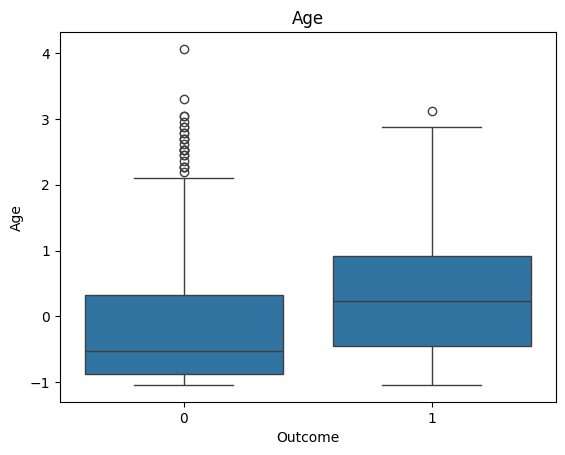

In [ ]:
# Box plots for each feature by 'Outcome' to observe the distribution and potential outliers
features = df.columns.drop('Outcome')
for feature in features:
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(feature)
    plt.show()

In [ ]:
# Model Building
"""
## Model Building

In this phase, we develop machine learning models to predict the onset of diabetes. We start with a logistic regression model as a baseline,
then explore more complex models like Gradient Boosting Classifier and Random Forest Classifier. This process involves splitting the data
into training and testing sets, model training, and preliminary evaluation.
"""

# Splitting the dataset into training and testing sets
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
print("Logistic Regression Model Evaluation:")
print(classification_report(y_test, log_reg_pred))

Logistic Regression Model Evaluation:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [ ]:
# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf_pred = gb_clf.predict(X_test)
print("Gradient Boosting Classifier Evaluation:")
print(classification_report(y_test, gb_clf_pred))

Gradient Boosting Classifier Evaluation:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



In [ ]:
# Support Vector Machine (SVM) model

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Support Vector Classifier
svm_clf = SVC(kernel='rbf', C=1.0, gamma='auto')  # RBF Kernel

# Fit the model to the training data
svm_clf.fit(X_train, y_train)

# Make predictions on the test set
svm_predictions = svm_clf.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
svm_class_report = classification_report(y_test, svm_predictions)

# Display the results
print("SVM Model Performance:")
print("----------------------")
print(f"Accuracy: {svm_accuracy * 100:.2f}%\n")
print("Confusion Matrix:")
print(svm_conf_matrix, "\n")
print("Classification Report:")
print(svm_class_report)

SVM Model Performance:
----------------------
Accuracy: 74.89%

Confusion Matrix:
[[125  26]
 [ 32  48]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       151
           1       0.65      0.60      0.62        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



In [ ]:
# Model Evaluation and Selection
"""
## Model Evaluation and Selection

After training the models, we compare their performance based on accuracy, precision, recall, and F1-score. This comparison helps in selecting the
most effective model for predicting diabetes. Additionally, we analyze the confusion matrix for each model to assess their true positive and false positive rates. We discuss the potential reasons behind the performance of various models and their suitability for deployment.
"""

# Print accuracy for each model
print("Model Performance Summary:")
print("--------------------------------------------------")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, log_reg_pred):.2f}")
print(f"Gradient Boosting Classifier Accuracy: {accuracy_score(y_test, gb_clf_pred):.2f}")
print(f"SVM Model Accuracy: {accuracy_score(y_test, svm_predictions):.2f}")

# Print classification report for each model
print("\nClassification Report for Each Model:")
print("--------------------------------------------------")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_reg_pred))
print("Gradient Boosting Classifier Classification Report:")
print(classification_report(y_test, gb_clf_pred))
print("SVM Model Classification Report:")
print(classification_report(y_test, svm_predictions))

# Print confusion matrix for each model
print("\nConfusion Matrix for Each Model:")
print("--------------------------------------------------")
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, log_reg_pred))
print("Gradient Boosting Classifier Confusion Matrix:")
print(confusion_matrix(y_test, gb_clf_pred))
print("SVM Model Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))


Model Performance Summary:
--------------------------------------------------
Logistic Regression Accuracy: 0.74
Gradient Boosting Classifier Accuracy: 0.75
SVM Model Accuracy: 0.75

Classification Report for Each Model:
--------------------------------------------------
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75 

In [ ]:
# Data Overview continued
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Data types of each column
data_types = df.dtypes
print("\nData types of each column:\n", data_types)

# Summary statistics for numerical features
summary_statistics = df.describe()
print("\nSummary statistics for numerical features:\n", summary_statistics)

# Checking the balance of the target variable
target_balance = df['Outcome'].value_counts(normalize=True)
print("\nDistribution of the target variable 'Outcome':\n", target_balance)


Missing values in each column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Data types of each column:
 Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

Summary statistics for numerical features:
         Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  7.680000e+02  7.680000e+02   7.680000e+02   7.680000e+02  7.680000e+02   
mean  -6.476301e-17 -9.251859e-18   1.503427e-17   1.006140e-16 -3.006854e-17   
std    1.000652e+00  1.000652e